# Статистика, DS-поток
## Задание SP.13

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**


Практика:
* Задача P1 &mdash; 70 баллов;
* Задача P2 &mdash; 70 баллов.

**Важность задач:**

* *высокая:* все задачи :)

In [385]:
# Bot check

# HW_ID: ds_sp13
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [386]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.calibration import CalibrationDisplay
from sklearn.calibration import CalibratedClassifierCV

import os

sns.set(style='whitegrid', palette='Set2')

---
### Задача P1.


На семинаре мы рассмотрели различные подходы к калибровке классификационных моделей. Но помимо этого хочется иметь метрики калибровки для сравнения качества полученных моделей.

Сгенерируем выборку, в которой классы не являются линейно-разделимыми, а также добавим к ней фоновый шум из точек разных классов.

Используйте функцию `make_blobs`.

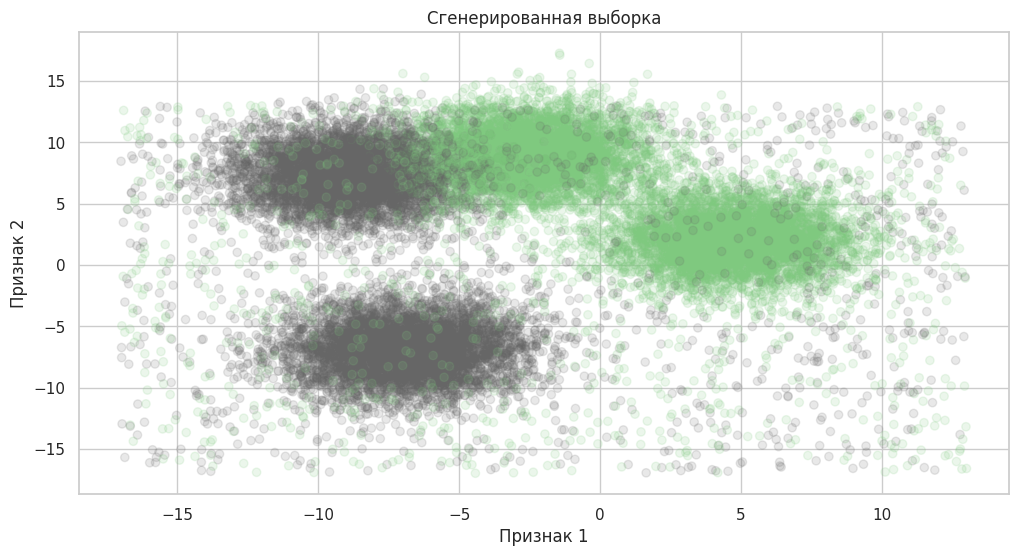

In [387]:
X, y = make_blobs(
    n_samples=20000, n_features=2, centers=4, 
    cluster_std=2.1, random_state=42
)
y = (y>=2).astype(int)

# Шум
n_noise = 2000
X = np.vstack([X, sps.uniform(loc=-17, scale=30).rvs((n_noise, 2))])
y = np.hstack([y, sps.bernoulli(p=0.5).rvs(n_noise)])

plt.figure(figsize=(12, 6))
plt.title('Сгенерированная выборка')
plt.scatter(
    X[:, 0], X[:, 1], 
    c=y, alpha=0.15, cmap='Accent'
)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Разделите выборку на обучение, валидацию и тест.

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25)

Обучите любые три классификационные модели на данных, выведите их метрики.

In [389]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

model3 = GradientBoostingClassifier(max_depth=3)
model3.fit(X_train, y_train)

GradientBoostingClassifier()

In [390]:
for i, tmp_model in enumerate([model1, model2, model3]):
    precision = precision_score(y_test, tmp_model.predict(X_test))
    recall = recall_score(y_test, tmp_model.predict(X_test))
    f = f1_score(y_test, tmp_model.predict(X_test))

    print(f"Модель {i}: precision = {precision:.2f}, recall = {recall:.2f}, f1_score = {f:.2f}")

Модель 0: precision = 0.93, recall = 0.93, f1_score = 0.93
Модель 1: precision = 0.93, recall = 0.92, f1_score = 0.93
Модель 2: precision = 0.93, recall = 0.93, f1_score = 0.93


Отрисуйте калибровочные кривые и гистограммы предсказаний данных моделей. Какие выводы можно сделать?

In [391]:
def calibration_curves(clf_list, figsize=(12, 7)):
    '''
    Отрисовка калибровочной кривой.
    
    clf_list -- список кортежей (обученный классификатор, его название)
    figsize -- размер фигуры
    '''    
    
    f, ax = plt.subplots(figsize=figsize)

    for i, (clf, name) in enumerate(clf_list):
        probs = clf.predict_proba(X_test)[:, 1]
        CalibrationDisplay.from_predictions(
            y_test, probs, n_bins=20, lw=3, name=name, ax=ax, strategy='quantile'
        )
    ax.set_xlabel('Предсказанная вероятность (среднее внутри бина)')
    ax.set_ylabel('Доля класса 1 в бине')
    ax.set_title('Сравнение калибровочных кривых')
    plt.show();

def draw_probs_hist(clf_list, X_test, ncols=3):
    '''
    Отрисовка гистограмм предсказаний вероятностей.
    
    clf_list -- список кортежей (обученный классификатор, его название)
    X_test -- тестовая выборка
    ncols -- количество колонок для отрисовки графика
    '''

    with sns.axes_style('whitegrid'):
        nrows = int(np.ceil(len(clf_list) / ncols))
        plt.figure(figsize=(18, 4*nrows))

        for i, (clf, name) in enumerate(clf_list):
            plt.subplot(nrows, ncols, i+1)
            y_prob = clf.predict_proba(X_test)[:, 0]
            plt.hist(y_prob, range=(0, 1), bins=10, label=name)
            plt.title(name)
            plt.xlabel('Предсказ. вероятность')

        plt.tight_layout()
        plt.show()

In [392]:
def draw_prob_predictions(clf, X_test, name, step=0.1):
    '''
    Отрисовка предсказаний вероятностей.
    
    clf -- обученный классификатор
    X_test -- тестовая выборка
    name -- имя классификатора
    step -- шаг сетки
    '''

    x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
    y_min, y_max = X_test[:, 1].min(), X_test[:, 1].max()

    X_grid = np.mgrid[x_min:x_max:step, y_min:y_max:step]
    size_x, size_y = X_grid.shape[1:]
    X_grid_list = X_grid.reshape((2, size_x*size_y)).T

    probs_pred = clf.predict_proba(X_grid_list)[:, 0]

    plt.figure(figsize=(10, 7))
    plt.title(f'Предсказания {name}')
    plt.pcolormesh(
        X_grid[0], X_grid[1], probs_pred.reshape((size_x, size_y)), cmap='Greens',
        vmin=0, vmax=1
    )
    plt.scatter(
        X_test[:, 0], X_test[:, 1], 
        c=y_test, alpha=0.5, cmap='cool'
    )
    plt.xlim((x_min, x_max)), plt.ylim((y_min, y_max))
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()

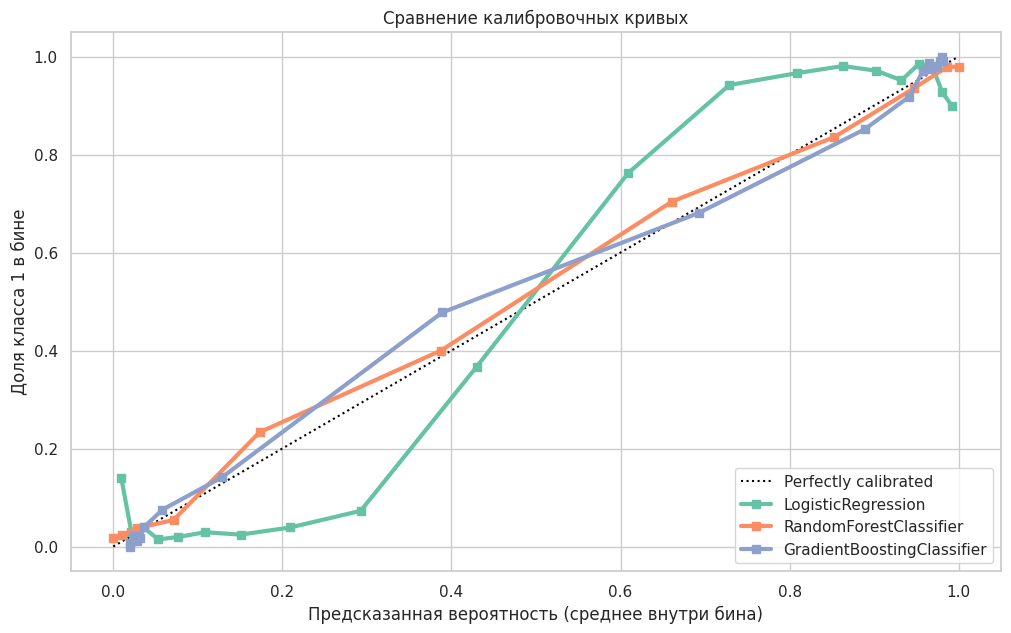

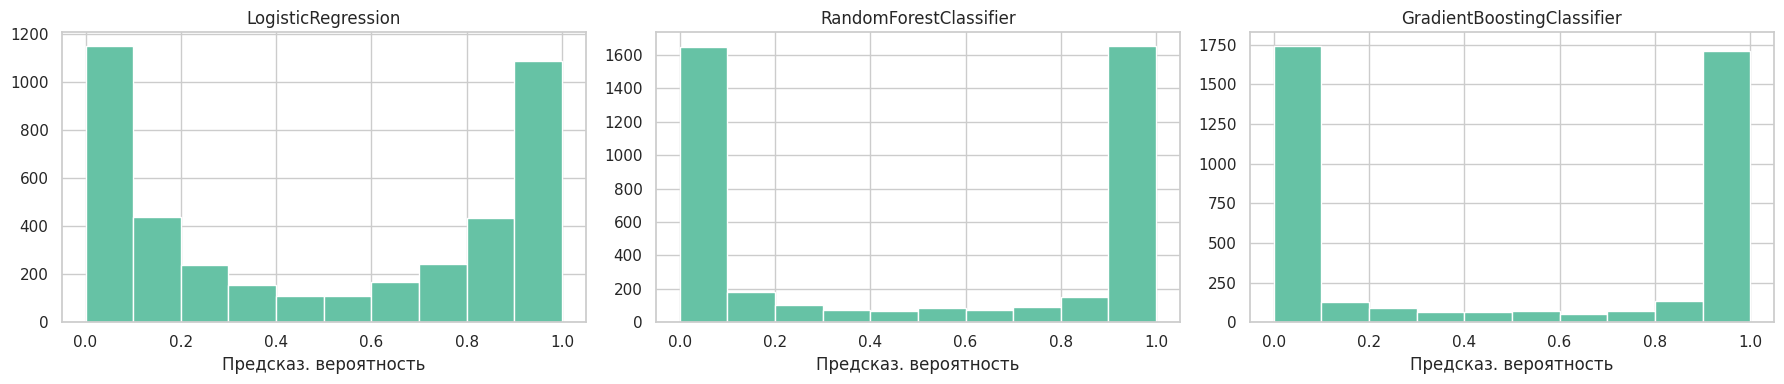

In [393]:
clf_list = [
    (model1, 'LogisticRegression'),
    (model2, 'RandomForestClassifier'),
    (model3, 'GradientBoostingClassifier'),
]


calibration_curves(clf_list)
draw_probs_hist(clf_list, X_test)

Из графика и гистограммы видно, что предсказания модели не откалиброваны. Виной этому служит нелинейная зависимость данных. Отсюда же вытаекает неуверенность модели в классфикации.

Отдельно посмотрим на логистическую регрессию

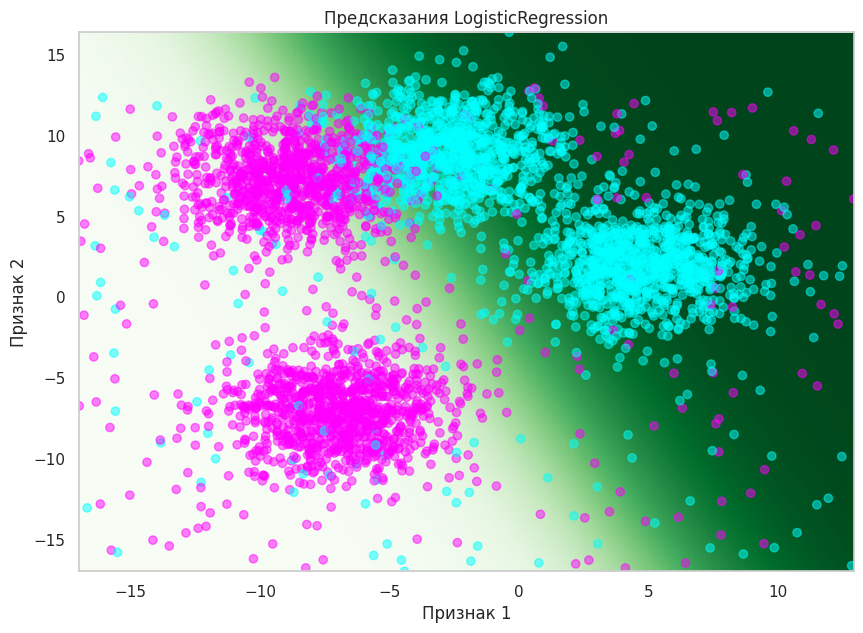

In [394]:
draw_prob_predictions(model1, X_test, name='LogisticRegression')

Откалибруйте модели. И посмотрите на кривые для новых моделей. Сделайте выводы.

In [395]:
model1_calibrated_isotonic = CalibratedClassifierCV(
    estimator=model1, cv="prefit", method="isotonic"
).fit(X_val, y_val)

model1_calibrated_sigmoid = CalibratedClassifierCV(
    estimator=model1, cv="prefit", method="sigmoid"
).fit(X_val, y_val)

model2_calibrated_isotonic = CalibratedClassifierCV(
    estimator=model2, cv="prefit", method="isotonic"
).fit(X_val, y_val)

model2_calibrated_sigmoid = CalibratedClassifierCV(
    estimator=model2, cv="prefit", method="sigmoid"
).fit(X_val, y_val)

model3_calibrated_isotonic = CalibratedClassifierCV(
    estimator=model3, cv="prefit", method="isotonic"
).fit(X_val, y_val)

model3_calibrated_sigmoid = CalibratedClassifierCV(
    estimator=model3, cv="prefit", method="sigmoid"
).fit(X_val, y_val)

In [396]:
models = [
    {"name": "Logistic Regression", "calibration": "Isotonic", "model": model1_calibrated_isotonic},
    {"name": "Logistic Regression", "calibration": "Sigmoid", "model": model1_calibrated_sigmoid},
    {"name": "Random Forest", "calibration": "Isotonic", "model": model2_calibrated_isotonic},
    {"name": "Random Forest", "calibration": "Sigmoid", "model": model2_calibrated_sigmoid},
    {"name": "Gradient Boosting", "calibration": "Isotonic", "model": model3_calibrated_isotonic},
    {"name": "Gradient Boosting", "calibration": "Sigmoid", "model": model3_calibrated_sigmoid},
]

for model_info in models:
    name = model_info["name"]
    calibration = model_info["calibration"]
    tmp_model = model_info["model"]

    precision = precision_score(y_test, tmp_model.predict(X_test))
    recall = recall_score(y_test, tmp_model.predict(X_test))
    f = f1_score(y_test, tmp_model.predict(X_test))

    print(f"{name} ({calibration} calibration): precision = {precision:.2f}, recall = {recall:.2f}, f1_score = {f:.2f}")


Logistic Regression (Isotonic calibration): precision = 0.93, recall = 0.93, f1_score = 0.93
Logistic Regression (Sigmoid calibration): precision = 0.93, recall = 0.93, f1_score = 0.93
Random Forest (Isotonic calibration): precision = 0.92, recall = 0.92, f1_score = 0.92
Random Forest (Sigmoid calibration): precision = 0.93, recall = 0.92, f1_score = 0.92
Gradient Boosting (Isotonic calibration): precision = 0.93, recall = 0.94, f1_score = 0.93
Gradient Boosting (Sigmoid calibration): precision = 0.93, recall = 0.93, f1_score = 0.93


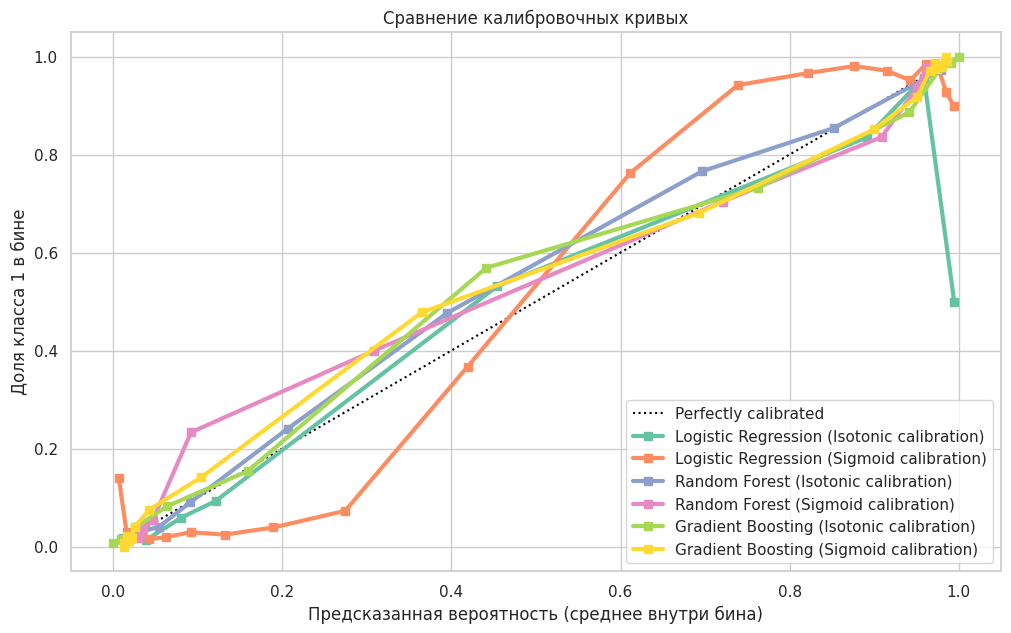

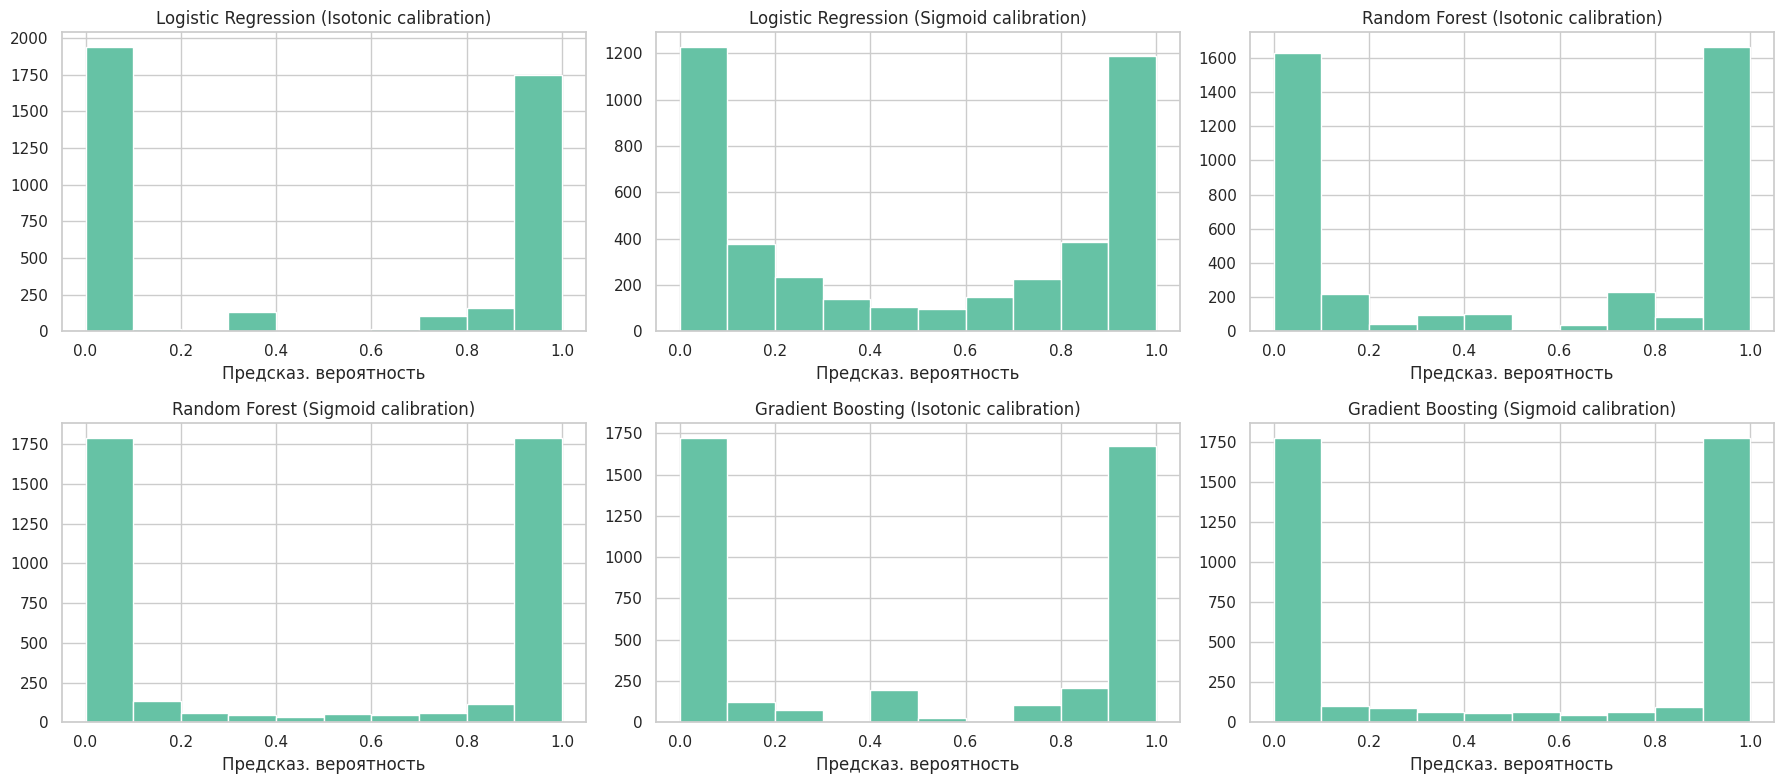

In [397]:
clf_list = [
    (model1_calibrated_isotonic, 'Logistic Regression (Isotonic calibration)'),
    (model1_calibrated_sigmoid, 'Logistic Regression (Sigmoid calibration)'),
    (model2_calibrated_isotonic, 'Random Forest (Isotonic calibration)'),
    (model2_calibrated_sigmoid, 'Random Forest (Sigmoid calibration)'),
    (model3_calibrated_isotonic, 'Gradient Boosting (Isotonic calibration)'),
    (model3_calibrated_sigmoid, 'Gradient Boosting (Sigmoid calibration)'),
]

# Вызов функций с обновленным списком моделей
calibration_curves(clf_list)
draw_probs_hist(clf_list, X_test)


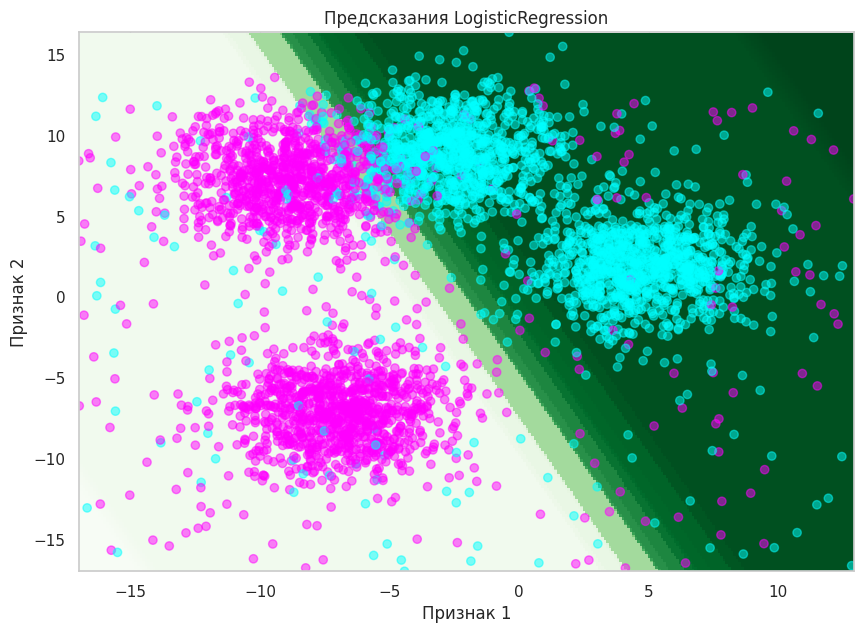

In [398]:
draw_prob_predictions(model1_calibrated_isotonic, X_test, name='LogisticRegression')

Как видим, калибровка значительно повысила качество логистической регрессии, остальные модели почти никак не поменялись. При помощи калибровки все модели стали лучше ложится на прямую, соответсвующую идеальной калибровке.

---

Для оценки калибровки используются, как правило, две метрики:
- Expected Callibration Error
- Brier Score

**Expected Callibration Error**

Данная метрика наследует идеи гистограммной калибровки. Пусть $B_1, \dots, B_k$ &mdash; разбиение отрезка $[0, 1]$ на непересекающиеся бины.

$$ECE = \sum_{j = 1}^k \cfrac{\sum_{i=1}^n I\{x_i \in B_j\}}{n} \left|\overline{y}(B_j) - \overline{p}(B_j)\right|$$

**Brier Score**

Данный подход ближе к изотонической регрессии.
$$BS = \sum_{i=1}^n (y_i - p(x_i))^2.$$
Причем в качестве функции разницы рассматривают не только квадратичную ошибку.

---

Реализуйте функции для подсчета метрик:

In [399]:
def ECE(y_test, y_pred, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    bin_indices = np.digitize(y_pred, bins) - 1
    ece = 0
    n = len(y_pred)

    for b in range(n_bins):
        bin_mask = bin_indices == b
        if np.any(bin_mask):

            bin_true = y_test[bin_mask]
            bin_pred = y_pred[bin_mask]

            bin_accuracy = np.mean(bin_true)
            bin_confidence = np.mean(bin_pred)

            bin_weight = len(bin_true) / n
            ece += bin_weight * np.abs(bin_accuracy - bin_confidence)

    return ece

In [400]:
def BS(y_test, y_pred):
    return np.sum((y_test - y_pred) ** 2)  

Проанализируйте, какой метод калибровки лучше подоходит для каждой из моделей.

In [401]:
for model in clf_list:
    ece = ECE(y_test, model[0].predict_proba(X_test)[:, 0])
    bs = BS(y_test, model[0].predict_proba(X_test)[:, 1])

    print(f"{model[1]} : ECE = {ece:.2f}, BS = {bs:.2f}")


Logistic Regression (Isotonic calibration) : ECE = 0.87, BS = 240.91
Logistic Regression (Sigmoid calibration) : ECE = 0.81, BS = 279.77
Random Forest (Isotonic calibration) : ECE = 0.85, BS = 242.58
Random Forest (Sigmoid calibration) : ECE = 0.86, BS = 244.29
Gradient Boosting (Isotonic calibration) : ECE = 0.80, BS = 225.41
Gradient Boosting (Sigmoid calibration) : ECE = 0.87, BS = 221.82


**Вывод:**

В работе мы увидили, как калибровки могут улучшить качество моделей. Особенно хорошо это наблюдается для логистической регрессии, чей f1-score вырос на 0.2. Для Случайного леса и градиентного бустинга действие калибровок было менее заметным, а иногда и ухудшало увереннсоть модели в ответе.

Для логистической регрессии лучше подходит изотоническая калибровка.

Для случайного леса и градиентного леса нет принципиального отличия между калибровками.

---
### Задача P2.


Исследуем, насколько скалиброванны нейронные сети. Рассмотрим датасет <a href="https://www.kaggle.com/datasets/chetankv/dogs-cats-images">Dogs & Cats Images</a>. Требуется определить, кто изображен на картинке &mdash; собака или кошка.

Выделите из обучающего набора выделите трейн и валидацию в соотношении 3:1.

In [402]:
from torch.utils.data import random_split
from sklearn.metrics import accuracy_score


train_dir = "/kaggle/input/dogs-cats-images/dataset/training_set"
test_dir = "/kaggle/input/dogs-cats-images/dataset/test_set"

transform = Compose([
    Resize((224, 224)),  
    ToTensor()           
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_size = int(0.8 * len(train_dataset)) 
val_size = len(train_dataset) - train_size  

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print("Классы:", train_dataset.dataset.classes)
print(f"Количество обучающих изображений: {len(train_dataset)}")
print(f"Количество валидационных изображений: {len(val_dataset)}")
print(f"Количество тестовых изображений: {len(test_dataset)}")

img, label = train_dataset[0]
print("Размер изображения:", img.shape)
print("Метка класса:", label)


Классы: ['cats', 'dogs']
Количество обучающих изображений: 6400
Количество валидационных изображений: 1600
Количество тестовых изображений: 2000
Размер изображения: torch.Size([3, 224, 224])
Метка класса: 1


Создадим loader

In [403]:
BATCH_SIZE = 64
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,  # Размер батча
    shuffle=True,   # Перемешивание данных
    num_workers=4   
)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=4)

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=4)

Постройте простую сверточную нейронную сеть для классификации изображений и обучите ее на тренировочной части данных. Используйте хотя бы несколько сверточных слоев, но слишком много не стоит.

In [404]:
class MyModel(nn.Module):
    def __init__(self, num_classes=1):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(in_features=512 * 14 * 14, out_features=256)
        self.dropout = nn.Dropout(p=0.5)
        self.linear2 = nn.Linear(in_features=256, out_features=num_classes)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool4(x)

        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        
        if self.linear2.out_features == 2:  # Binary classification
            x = torch.sigmoid(x)
        else:
            x = torch.softmax(x, dim=1)

        return x
    def predict_proba(self, x):
        self.eval()
        with torch.no_grad():
            output = self.forward(x)
            
            return output

In [405]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

my_model = MyModel(num_classes=2)
my_model = my_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(my_model.parameters(), lr=1e-5)

In [406]:
def train(model, train_loader, criterion, optimizer, num_epochs=10, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
    model = model.to(device)
    epoch_losses = []
    epoch_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    return epoch_losses, epoch_accuracies

In [407]:
epoch_losses, epoch_accuracies = train(my_model, train_loader, criterion, optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.6338, Accuracy: 64.50%
Epoch [2/10], Loss: 0.5694, Accuracy: 73.27%
Epoch [3/10], Loss: 0.5301, Accuracy: 78.38%
Epoch [4/10], Loss: 0.5112, Accuracy: 80.09%
Epoch [5/10], Loss: 0.4872, Accuracy: 83.47%
Epoch [6/10], Loss: 0.4707, Accuracy: 85.17%
Epoch [7/10], Loss: 0.4612, Accuracy: 86.22%
Epoch [8/10], Loss: 0.4485, Accuracy: 87.88%
Epoch [9/10], Loss: 0.4348, Accuracy: 89.55%
Epoch [10/10], Loss: 0.4280, Accuracy: 90.09%


Также выберите один из <a href="https://pytorch.org/vision/stable/models.html">видов архитектруры</a> нейронной сети для классификации изображений из torchvision, например, ResNet. Определите для него 3 варианта архитектуры с разным количеством параметров.

In [408]:
import torchvision.models as models

resnet18 = models.resnet18(pretrained=False)
resnet18.fc = torch.nn.Linear(resnet18.fc.in_features, 2) 

resnet34 = models.resnet34(pretrained=False)
resnet34.fc = torch.nn.Linear(resnet34.fc.in_features, 2)

resnet50 = models.resnet50(pretrained=False)
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, 2)

In [409]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(resnet18.parameters(), lr=1e-4)

epoch_losses_resnet18, epoch_accuracies_resnet18 = train(resnet18, train_loader, criterion, optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.6285, Accuracy: 65.00%
Epoch [2/10], Loss: 0.5186, Accuracy: 74.88%
Epoch [3/10], Loss: 0.4014, Accuracy: 81.78%
Epoch [4/10], Loss: 0.2511, Accuracy: 89.77%
Epoch [5/10], Loss: 0.1260, Accuracy: 95.25%
Epoch [6/10], Loss: 0.0819, Accuracy: 96.89%
Epoch [7/10], Loss: 0.0471, Accuracy: 98.45%
Epoch [8/10], Loss: 0.0316, Accuracy: 98.75%
Epoch [9/10], Loss: 0.0314, Accuracy: 99.03%
Epoch [10/10], Loss: 0.0297, Accuracy: 99.02%


In [410]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(resnet34.parameters(), lr=1e-4)

epoch_losses_resnet34, epoch_accuracies_resnet34 = train(resnet34, train_loader, criterion, optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.6415, Accuracy: 63.50%
Epoch [2/10], Loss: 0.5601, Accuracy: 71.27%
Epoch [3/10], Loss: 0.4688, Accuracy: 77.70%
Epoch [4/10], Loss: 0.3707, Accuracy: 83.52%
Epoch [5/10], Loss: 0.2788, Accuracy: 88.19%
Epoch [6/10], Loss: 0.1598, Accuracy: 94.02%
Epoch [7/10], Loss: 0.1312, Accuracy: 94.75%
Epoch [8/10], Loss: 0.0896, Accuracy: 96.59%
Epoch [9/10], Loss: 0.0668, Accuracy: 97.67%
Epoch [10/10], Loss: 0.0657, Accuracy: 97.45%


In [411]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(resnet50.parameters(), lr=1e-4)

epoch_losses_resnet50, epoch_accuracies_resnet50 = train(resnet50, train_loader, criterion, optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.6710, Accuracy: 60.27%
Epoch [2/10], Loss: 0.6380, Accuracy: 64.33%
Epoch [3/10], Loss: 0.6093, Accuracy: 66.80%
Epoch [4/10], Loss: 0.5861, Accuracy: 69.14%
Epoch [5/10], Loss: 0.5641, Accuracy: 70.70%
Epoch [6/10], Loss: 0.5586, Accuracy: 71.88%
Epoch [7/10], Loss: 0.5289, Accuracy: 73.80%
Epoch [8/10], Loss: 0.4871, Accuracy: 76.72%
Epoch [9/10], Loss: 0.4531, Accuracy: 78.70%
Epoch [10/10], Loss: 0.3979, Accuracy: 81.50%


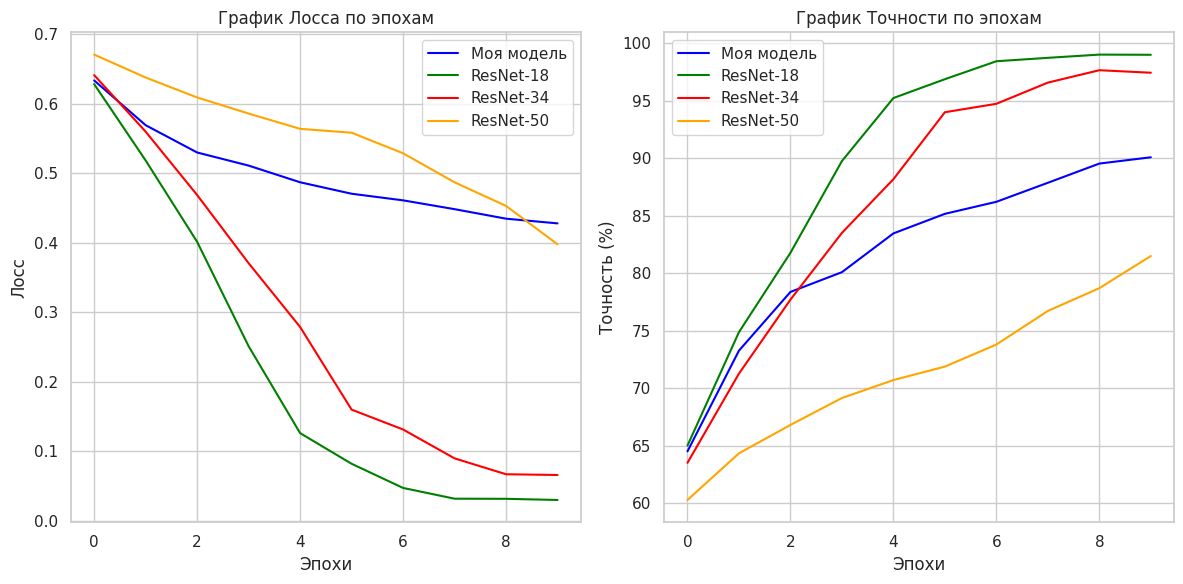

In [412]:
import matplotlib.pyplot as plt

def plot_training_results(epoch_losses, epoch_accuracies, epoch_losses_resnet18, epoch_accuracies_resnet18,
                          epoch_losses_resnet34, epoch_accuracies_resnet34, epoch_losses_resnet50, epoch_accuracies_resnet50):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_losses, label='Моя модель', color='blue')
    plt.plot(epoch_losses_resnet18, label='ResNet-18', color='green')
    plt.plot(epoch_losses_resnet34, label='ResNet-34', color='red')
    plt.plot(epoch_losses_resnet50, label='ResNet-50', color='orange')
    plt.title('График Лосса по эпохам')
    plt.xlabel('Эпохи')
    plt.ylabel('Лосс')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_accuracies, label='Моя модель', color='blue')
    plt.plot(epoch_accuracies_resnet18, label='ResNet-18', color='green')
    plt.plot(epoch_accuracies_resnet34, label='ResNet-34', color='red')
    plt.plot(epoch_accuracies_resnet50, label='ResNet-50', color='orange')
    plt.title('График Точности по эпохам')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_results(epoch_losses, epoch_accuracies, epoch_losses_resnet18, epoch_accuracies_resnet18,
                      epoch_losses_resnet34, epoch_accuracies_resnet34, epoch_losses_resnet50, epoch_accuracies_resnet50)


In [413]:
def evaluate_model(model, dataloader, criterion, device):    
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()  
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    average_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    
    return average_loss, accuracy

models = {
    "MyModel": my_model,
    "ResNet18": resnet18,
    "ResNet34": resnet34,
    "ResNet50": resnet50
}

for model_name, model in models.items():
    average_loss, accuracy = evaluate_model(model, test_loader, criterion, device)
    print(f"{model_name}:")
    print(f"Test Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%\n")


MyModel:
Test Loss: 0.4995, Accuracy: 80.50%

ResNet18:
Test Loss: 0.8310, Accuracy: 76.00%

ResNet34:
Test Loss: 0.8108, Accuracy: 75.80%

ResNet50:
Test Loss: 0.8570, Accuracy: 64.10%



Для каждой рассмотренной ранее модели выполните следующие действия.
* Посмотрите на калибровочную кривую и оценку качества калибровки.
* Примените методы калибровки и сравните результаты. Посчитайте, как изменилась точность классификации на тестовой части данных.

Поясните, почему калибровку необходимо выполнять на валидационной части данных, а оценивать точность классификации &mdash; на тестовом.

Посмотрим на калибровочные кривые

In [414]:
def calibration_curves_for_model(model_list, test_loader, device, figsize=(12, 7)):
    f, ax = plt.subplots(figsize=figsize)

    for model, name in model_list:
        model.to(device)
        model.eval()

        all_probs = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)

                probs = torch.sigmoid(outputs).cpu().numpy()[:, 1]
                all_probs.append(probs)
                all_labels.append(labels.cpu().numpy())

        all_probs = np.concatenate(all_probs)
        all_labels = np.concatenate(all_labels)

        CalibrationDisplay.from_predictions(
            all_labels, all_probs, n_bins=20, lw=3, name=name, ax=ax, strategy='quantile'
        )

    ax.set_xlabel('Предсказанная вероятность (среднее внутри бина)')
    ax.set_ylabel('Доля класса 1 в бине')
    ax.set_title('Сравнение калибровочных кривых')
    plt.show()

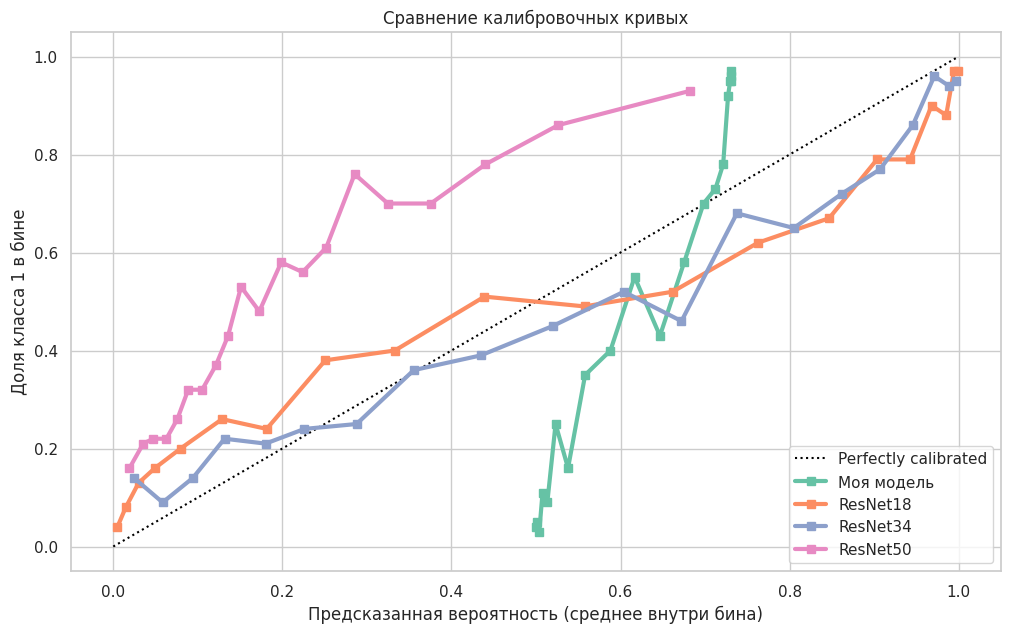

In [415]:
clf_list = [
    (my_model, 'Моя модель'),
    (resnet18, 'ResNet18'),
    (resnet34, 'ResNet34'),
    (resnet50, 'ResNet50'),
]

calibration_curves_for_model(clf_list, test_loader, device=device)

Откалибруем все модели.

In [416]:
class MyModelWrapper:
    def __init__(self, model):
        self.model = model
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)
        self.classes_ = [0, 1]
    
    def fit(self, X, y):
        return self  
    
    def predict_proba(self, X):
        self.model.eval()
        all_probs = []
        X = torch.tensor(X).float()
        dataset = torch.utils.data.TensorDataset(X)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
        
        with torch.no_grad():
            for batch in data_loader:
                inputs = batch[0].to(self.device)
                outputs = self.model(inputs)
                probs = F.softmax(outputs, dim=1)
                all_probs.append(probs.cpu().numpy())
        
        return np.vstack(all_probs)

def get_inputs_and_labels(data_loader):
    inputs, labels = [], []
    for batch_inputs, batch_labels in data_loader:
        inputs.append(batch_inputs)
        labels.append(batch_labels)
    inputs = torch.cat(inputs, dim=0)
    labels = torch.cat(labels, dim=0)
    return inputs, labels

def calibrate_model(model, val_loader, calibration_method='isotonic'):
    X_val, y_val = get_inputs_and_labels(val_loader)
    
    X_val = X_val.cpu().numpy()
    y_val = y_val.cpu().numpy()
    
    model_wrapped = MyModelWrapper(model)
    
    calibrated_model = CalibratedClassifierCV(estimator=model_wrapped, method=calibration_method, cv='prefit')
    calibrated_model.fit(X_val, y_val)
    
    return calibrated_model

calibrated_clfs = []
for clf, name in tqdm(clf_list):
    calibrated_model = calibrate_model(clf, val_loader, calibration_method='sigmoid')
    calibrated_clfs.append((calibrated_model, name + " (sigmoid)"))
    
    calibrated_model = calibrate_model(clf, val_loader, calibration_method='isotonic')
    calibrated_clfs.append((calibrated_model, name + " (isotonic)"))


  0%|          | 0/4 [00:00<?, ?it/s]

In [417]:
def calibration_curves_for_calibrated_models(model_list, test_loader, figsize=(10, 10)):
    n_plots = len(model_list) // 2
    n_rows = (n_plots + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=figsize)
    
    if n_plots % 2 != 0:
        axes[-1, 1].axis('off')
        
    tmp_idx = 0
    for idx, (calibrated_model, name) in enumerate(model_list):
        all_probs = []
        all_labels = []

        row = idx // 4
        col = (idx // 2) % 2
        ax = axes[row, col]
        
        for inputs, labels in test_loader:
            inputs = inputs.cpu().numpy()
            labels = labels.cpu().numpy()
            all_labels.append(labels)
            probs = calibrated_model.predict_proba(inputs)
            all_probs.append(probs[:, 1])
        
        all_probs = np.concatenate(all_probs)
        all_labels = np.concatenate(all_labels)
        
        CalibrationDisplay.from_predictions(
            all_labels, all_probs, n_bins=20, lw=1, name=name, ax=ax, strategy='quantile', alpha=0.6
        )
        
        ax.set_xlabel('Предсказанная вероятность (среднее внутри бина)')
        ax.set_ylabel('Доля класса 1 в бине')
        ax.set_title(f'Калибровочная кривая для {name}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

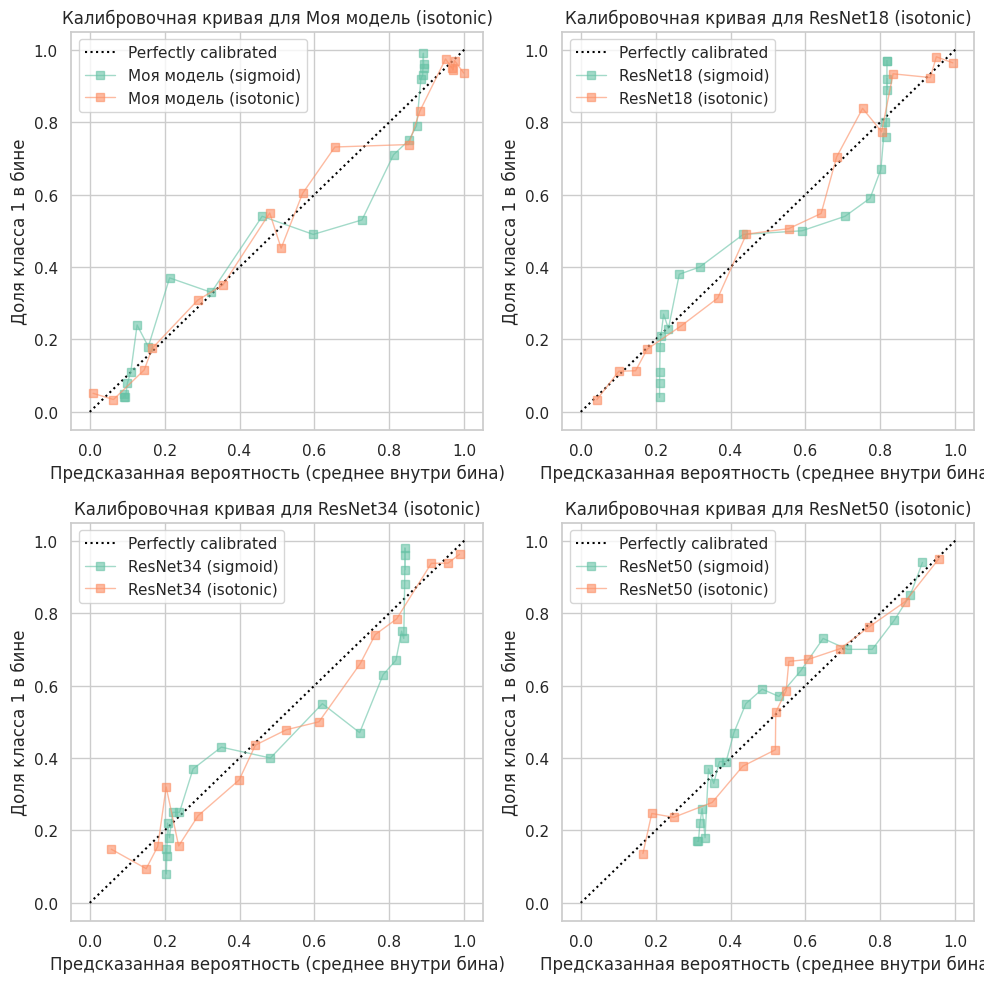

In [418]:
calibration_curves_for_calibrated_models(calibrated_clfs, test_loader)

In [419]:
def evaluate_calibrated_model(model, dataloader, device):
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            inputs = inputs.cpu().numpy()
            labels = labels.cpu().numpy()
            
            probs = model.predict_proba(inputs) 
            predicted = np.argmax(probs, axis=1)
            
            all_labels.append(labels)
            all_predictions.append(predicted)
    
    all_labels = np.concatenate(all_labels)
    all_predictions = np.concatenate(all_predictions)
    
    accuracy = accuracy_score(all_labels, all_predictions) * 100
    return accuracy

for tmp_model in calibrated_clfs:
    model = tmp_model[0]
    model_name = tmp_model[1]
    accuracy = evaluate_calibrated_model(model, test_loader, device)
    print(f"{model_name}:")
    print(f"Test Accuracy: {accuracy:.2f}%\n")


Моя модель (sigmoid):
Test Accuracy: 80.65%

Моя модель (isotonic):
Test Accuracy: 80.15%

ResNet18 (sigmoid):
Test Accuracy: 76.20%

ResNet18 (isotonic):
Test Accuracy: 76.20%

ResNet34 (sigmoid):
Test Accuracy: 75.20%

ResNet34 (isotonic):
Test Accuracy: 75.45%

ResNet50 (sigmoid):
Test Accuracy: 69.20%

ResNet50 (isotonic):
Test Accuracy: 69.35%



Мы калибруемся на валидации, чтобы избежать "подглядывания" в тестовые, то есть чтобы наша метрика была более репрезентативной.

Сделайте выводы.

Калибровка смогла незначительно улучшить качество моделей. Причем, как видно из графиков, некоторые модели ResNet уже были достаточно хорошо скалиброваны, в отличии от нашей.